# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab = tab.rename(columns={0: 'saudaveis', 1: 'doentes', 'All': 'total'})

tab['media_doentes'] = tab['doentes'] / tab['total']

tab.index = tab.index.map({0: 'female', 1: 'male', 'All': 'total'})
tab

flag_doente,saudaveis,doentes,total,media_doentes
sex,,,,
female,72,25,97,0.257732
male,92,114,206,0.553398
total,164,139,303,0.458746


In [5]:
tab['odds'] = tab['doentes']/tab['saudaveis']
tab

flag_doente,saudaveis,doentes,total,media_doentes,odds
sex,,,,,
female,72,25,97,0.257732,0.347222
male,92,114,206,0.553398,1.239130
total,164,139,303,0.458746,0.847561


In [6]:
tab['odds_ratio'] = tab['odds']/tab.loc['total','odds']
tab

flag_doente,saudaveis,doentes,total,media_doentes,odds,odds_ratio
sex,,,,,,
female,72,25,97,0.257732,0.347222,0.409672
male,92,114,206,0.553398,1.239130,1.461996
total,164,139,303,0.458746,0.847561,1.000000


In [7]:
tab['logito'] = np.log(tab['odds'])
tab

flag_doente,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito
sex,,,,,,,
female,72,25,97,0.257732,0.347222,0.409672,-1.057790
male,92,114,206,0.553398,1.239130,1.461996,0.214410
total,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [8]:
tab['WOE'] = np.log(tab['odds_ratio'])
tab

flag_doente,saudaveis,doentes,total,media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
female,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
male,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [9]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 40, 50, 60, 70, 120],
    labels=['até 40', '41-50', '51-60', '61-70', '70+']
)
df[['age', 'age_group']].head()

,age,age_group
0,63.0,61-70
1,67.0,61-70
2,67.0,61-70
3,37.0,até 40
4,41.0,41-50


In [13]:
tab_age = pd.crosstab(df['age_group'], df['flag_doente'], margins= True)
tab_age = tab_age.rename(columns={0: 'saudaveis', 1: 'doentes'})

tab_age['media_doentes'] = tab_age['doentes'] / tab_age['All']
tab_age['odds'] = tab_age['doentes']/tab_age['saudaveis']
tab_age['odds_ratio'] = tab_age['odds']/tab_age.loc['All','odds']
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio'])

tab_age

flag_doente,saudaveis,doentes,All,media_doentes,odds,odds_ratio,logito,WOE
age_group,,,,,,,,
até 40,12,6,18,0.333333,0.500000,0.589928,-0.693147,-0.527755
41-50,53,23,76,0.302632,0.433962,0.512013,-0.834798,-0.669405
51-60,64,66,130,0.507692,1.031250,1.216727,0.030772,0.196164
61-70,30,43,73,0.589041,1.433333,1.691127,0.360003,0.525395
70+,5,1,6,0.166667,0.200000,0.235971,-1.609438,-1.444045
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

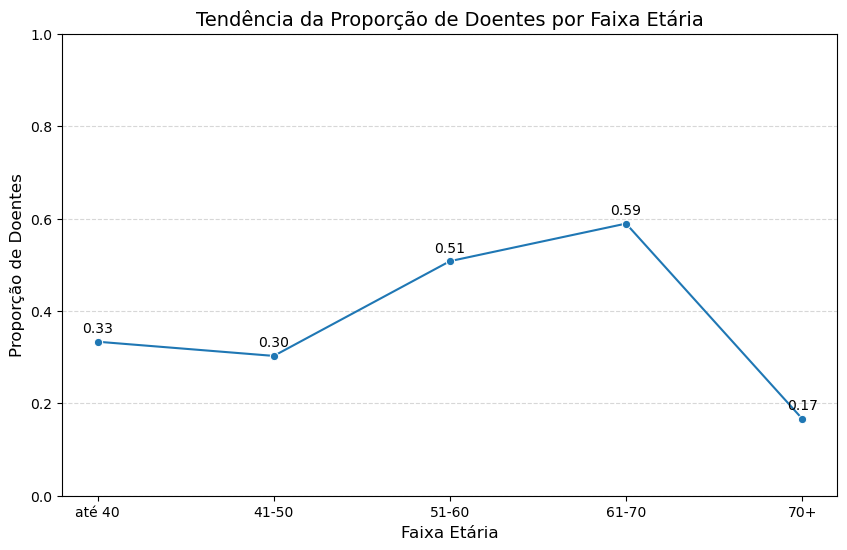

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x=tab_plot.index, y=tab_plot['media_doentes'], marker='o')

plt.title('Tendência da Proporção de Doentes por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Proporção de Doentes', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for index, value in enumerate(tab_plot['media_doentes']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.show()